<h2 align="center">CSxxxx Numerical Methods</h2> 
<h3 align="center">Assignment 2</h3> 
<h3 align="center">Rajat Vadiraj Dwaraknath - EE16B033</h3>

---
We first import numpy and matplotlib using pylab, and increase the size of the plots.

In [1]:
# Importing matplotlib and numpy directly
# Python 2.7
%pylab inline
rcParams['figure.figsize'] = 12, 9 # Increase size of plots

Populating the interactive namespace from numpy and matplotlib


1) For the first function, using integration by parts, we arrive at the following indefinite integral

$$\int_{0}^{\pi} e^{-x}\cos^{2}x = -e^{-x}(0.5 - 0.1(2\sin 2x - \cos 2x))$$


which when evaluated yields

$$0.6(1-e^{-\pi}) \approx 0.5470$$

We then implement the trapezoidal method and the required functions in python as follows:

In [2]:
def trap(f, a, b, n):
    """Performs trapezoidal integration of f from a to b using n trapezoids"""
    dx = float(b-a)/n
    area = f((a) + f(b))/2
    for i in xrange(1, n):
        area += f(a+i*dx)

    return area*dx

In [3]:
def function1(x):
    """Returns the value of the first function"""
    y = exp(-x)*cos(x)**2
    return y

def function2(x):
    """Returns the value of the second function"""
    if x>1 or x<-1: # To deal with precision errors which sometimes make x slightly greater than 1 leading to an error
        return 1
    y = cos(2*arccos(x))
    return y

# Antiderivative of function1
def inty1(x):
    """Returns the value of the antiderivate of the first function"""
    y = -exp(-x)*(0.5 - 0.1*(2*sin(2*x) - cos(2*x)))
    return y

We can now numerically evaluate the integral and find the error compared to the value obtained by analytically evaluating the same.

In [4]:
# Evaluate area using arbitrarily large number of trapezoids, say 1000
evalArea = trap(function1, 0, pi, 1000)
actualArea = inty1(pi) - inty1(0)
analyticError = abs((evalArea - actualArea)/actualArea)
print("Evaluated Area = %.6f\tActual Area = %.6f\t Relative error = %.6f" % (evalArea, actualArea, analyticError))

Evaluated Area = 0.573935	Actual Area = 0.574072	 Relative error = 0.000237


2) To make the difference between the area calculated by trap and by numpy.trapz $<10^{-6}$ , we must increase the number of trapezoids upto to $10^{6}$:

In [5]:
trapArea = trap(function1, 0, pi, int(1e6))
dx = pi*1e-6
x = np.arange(0,pi+dx,dx) # Required for numpy.trapz
y = [function1(i) for i in x]
numpyArea = numpy.trapz(y,x) # Find area using numpy.trapz

# Find absolute difference
difference = abs(numpyArea - trapArea)
print("Absolute difference between trap and numpy.trapz = %.10f" % difference)

Absolute difference between trap and numpy.trapz = 0.0000002729


Now, we gradually increase the number of trapezoids until the relative difference falls below a certain threshold. We can then plot the relative difference with the number of trapezoids using matplotlib. This is done in the function evalIntegral.

In [6]:
def evalIntegral(f, a, b, errorThreshold):
    """Repeatedly integrates f from a to b, increasing the number of trapezoids until the relative difference between 
    the value obtained from trap and numpy.trapz is less than errorThreshold, and also plots this 
    difference vs number of trapezoids"""
    n = 10 # Number of trapezoids
    ns = [] # List of n values
    errors = [] # List of error values
    
    # Finding area using trap and numpy.trapz and finding the difference
    error = 1
    while error>errorThreshold:
        ns.append(n) # Add to list of n
        dx = float(b-a)/n # Find stepsize
        area = trap(f, a, b, n) # Find area using trap
        
        x = numpy.arange(a,b+dx,dx) # Required for numpy.trapz
        y = [f(i) for i in x]
        numpyArea = numpy.trapz(y,x) # Find area using numpy.trapz  
        
        error = abs((area - numpyArea)/numpyArea) # Calculate relative error
        errors.append(error) # Add to list of errors
        n+=10 # Increment n
        
    # Plotting the data:
    plot(ns,errors)
    xlabel("Number of trapezoids")
    ylabel("Relative error compared to numpy")
    

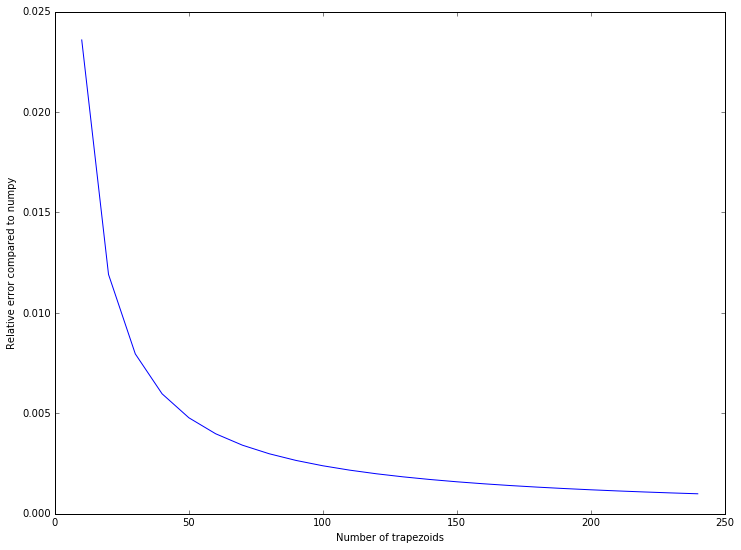

In [7]:
# For the first function
evalIntegral(function1, 0, 3.14, 0.001)

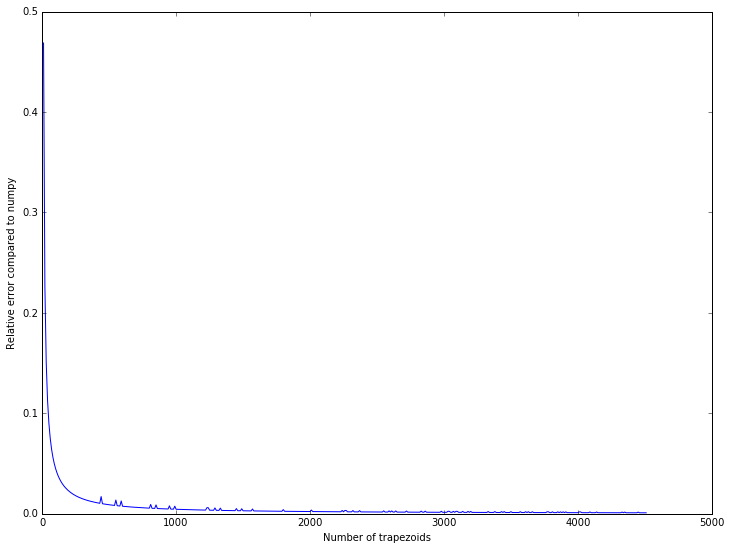

In [8]:
# For the second function
evalIntegral(function2, -1, 1, 0.001)

We can conclude from the above graphs that the error decreases as the number of trapezoids is increased.

3) Advantages in using Python compared to C:
* Code is simpler, shorter and easier to type and read.
* Access to a large number of libraries including numerical libraries and convenient plotting of graphs.
* IPython and IPython Notebooks are very convenient and effective for projects and assignments which involve both code and text.

Disadvantages in using Python compared to C:
* Python is considerably slower than C.